In [104]:
# Dependency imports
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
'''
sns.set_style({'axes.facecolor':'#E7E7F0', 'figure.facecolor':'white', \
               'axes.edgecolor': 'white', 'grid.color': 'white', \
              'axes.labelcolor': 'black', 'text.color': 'black', \
              'xtick.color': 'black', 'ytick.color': 'black'})
'''

# plotly standard imports
import plotly
plotly.tools.set_credentials_file(username='vivek.pandey', api_key='GcINHnvXXRBgEUUckTTf')

import plotly.graph_objs as go
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

# Cufflinks wrapper on plotly
import cufflinks

# Notebook customizations
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_colwidth = -1
import warnings
warnings.filterwarnings('ignore')

sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

### Properties EDA

In [105]:
properties_df = pd.read_csv("./output/engineered_trulia_properties.csv", sep="|", dtype={'zip_code': str}, encoding="latin1")
properties_df

,address,area_sqft,basement_type,built_year,city,exterior_type,heating_type,lot_size,no_of_baths,no_of_bedrooms,no_of_parking_spaces,no_of_stories,parking_type,property_type,property_url,state,tax_amount,tax_year,zip_code
0,160 162 Old Peckslip Rd,1352.0,NaN,1985,Holmes,NaN,NaN,32234.4,3.0,3.0,NaN,NaN,NaN,Multi-Family,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,NY,7718.79,0,12531
1,10 Cliff Ct,1184.0,NaN,1997,Holmes,NaN,NaN,60984.0,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,NaN,1992,Holmes,NaN,NaN,110206.8,2.5,3.0,NaN,NaN,NaN,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
3,3130 Grand Concourse #7R,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7r-bronx-ny-10458--2171936520,NY,NaN,2017,10468
4,3130 Grand Concourse #7S,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7s-bronx-ny-10458--2333495270,NY,NaN,2017,10458
5,3130 Grand Concourse #7P,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7p-bronx-ny-10458--2173798637,NY,NaN,2017,10458
6,3130 Grand Concourse #7N,103883.0,NaN,1955,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7n-bronx-ny-10458--2345496753,NY,NaN,2017,10458
7,3184 Grand Concourse #4E,80811.0,NaN,1965,Bronx,NaN,NaN,16552.8,NaN,NaN,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3184-grand-concourse-4e-bronx-ny-10458--2345502809,NY,NaN,2017,10458
8,4 Wheel Dr,NaN,NaN,0,Craryville,NaN,NaN,174240.0,NaN,NaN,NaN,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,NY,1509.69,2017,12521
9,Winding Ln,NaN,NaN,0,Craryville,NaN,NaN,7405.0,NaN,NaN,NaN,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/winding-ln-craryville-ny-12521--2158446526,NY,31.29,2017,12521


In [106]:
# Dropping columns that do not have any value for now
properties_df.drop(axis=0, inplace=True, columns=['basement_type', 'exterior_type', 'heating_type', \
                                                  'no_of_parking_spaces', 'no_of_stories', 'parking_type'])
properties_df

,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,property_url,state,tax_amount,tax_year,zip_code
0,160 162 Old Peckslip Rd,1352.0,1985,Holmes,32234.4,3.0,3.0,Multi-Family,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,NY,7718.79,0,12531
1,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,1992,Holmes,110206.8,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
3,3130 Grand Concourse #7R,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7r-bronx-ny-10458--2171936520,NY,NaN,2017,10468
4,3130 Grand Concourse #7S,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7s-bronx-ny-10458--2333495270,NY,NaN,2017,10458
5,3130 Grand Concourse #7P,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7p-bronx-ny-10458--2173798637,NY,NaN,2017,10458
6,3130 Grand Concourse #7N,103883.0,1955,Bronx,NaN,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3130-grand-concourse-7n-bronx-ny-10458--2345496753,NY,NaN,2017,10458
7,3184 Grand Concourse #4E,80811.0,1965,Bronx,16552.8,NaN,NaN,Coop,https://www.trulia.com/p/ny/bronx/3184-grand-concourse-4e-bronx-ny-10458--2345502809,NY,NaN,2017,10458
8,4 Wheel Dr,NaN,0,Craryville,174240.0,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,NY,1509.69,2017,12521
9,Winding Ln,NaN,0,Craryville,7405.0,NaN,NaN,Lot/Land,https://www.trulia.com/p/ny/craryville/winding-ln-craryville-ny-12521--2158446526,NY,31.29,2017,12521


In [107]:
properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704001 entries, 0 to 704000
Data columns (total 13 columns):
address           704001 non-null object
area_sqft         548310 non-null float64
built_year        704001 non-null int64
city              703970 non-null object
lot_size          678075 non-null float64
no_of_baths       421586 non-null float64
no_of_bedrooms    409810 non-null float64
property_type     704001 non-null object
property_url      704001 non-null object
state             703973 non-null object
tax_amount        509535 non-null float64
tax_year          704001 non-null int64
zip_code          703973 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 69.8+ MB


### Analyze and fill missing data

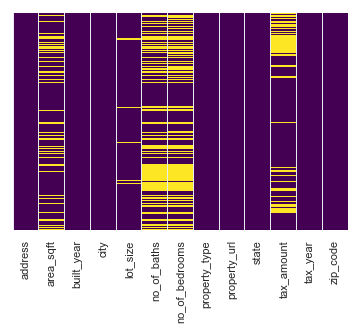

In [108]:
sns.heatmap(properties_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Lets look at how many rows have fully valid data
#### Right now, lets only keep entirely usable data and get to model training, we'll come back later for data imputation

In [109]:
properties_df = properties_df[~(properties_df['no_of_bedrooms'].isnull() | properties_df['no_of_baths'].isnull() | \
              (properties_df['no_of_bedrooms'] == 0) | (properties_df['no_of_baths'] == 0) | \
              (properties_df['built_year'] < 1500) | (properties_df['tax_year'] < 1800) | \
              properties_df['tax_amount'].isnull() | (properties_df['tax_amount'] < 10) | \
                properties_df['area_sqft'].isnull() | (properties_df['area_sqft'] < 100) | \
              properties_df['lot_size'].isnull() | (properties_df['lot_size'] < 100))]
properties_df

,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,property_url,state,tax_amount,tax_year,zip_code
1,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
2,26 Donovan Ln,1890.0,1992,Holmes,110206.8,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
12,553 Grape Hollow Rd,1272.0,1955,Holmes,40075.2,2.0,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/553-grape-hollow-rd-holmes-ny-12531--2305201702,NY,7221.77,2017,12531
13,59 Van De Carr Rd,768.0,1955,Craryville,6098.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/59-van-de-carr-rd-craryville-ny-12521--2011547953,NY,1473.62,2017,12521
14,55 Van De Carr Rd,888.0,1951,Craryville,9148.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/55-van-de-carr-rd-craryville-ny-12521--2011547934,NY,2129.89,2017,12521
16,126 Taghkanic Churchtown Rd,2775.0,1992,Craryville,510087.6,2.5,3.0,Farm/Ranch,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,NY,12348.22,2017,12521
17,110 Taghkanic Churchtown Rd,1619.0,2003,Craryville,384199.2,2.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,NY,10644.01,2017,12521
20,311 Taghkanic Churchtown Rd,1872.0,1990,Craryville,198198.0,1.0,4.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/311-taghkanic-churchtown-rd-craryville-ny-12521--2158455139,NY,7563.77,2017,12521
22,12 Taghkanic Churchtown Rd,1708.0,1998,Craryville,274428.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/12-taghkanic-churchtown-rd-craryville-ny-12521--2158455187,NY,5769.40,2017,12521
23,11 Taghkanic Churchtown Rd,1728.0,2007,Craryville,249163.2,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/11-taghkanic-churchtown-rd-craryville-ny-12521--1100838069,NY,5270.54,2017,12521


#### We've dropped about half the records here, so data imputation is really important for the future to be able to use that data

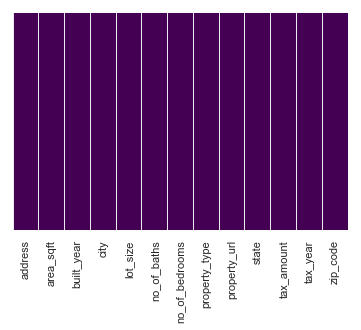

In [110]:
sns.heatmap(properties_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Lets look at the distribution of data in the columns to see come up with close values for imputation

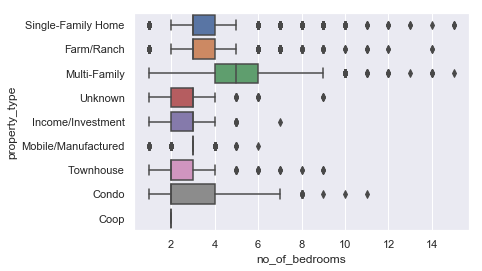

In [111]:
sns.boxplot(data=properties_df[~properties_df['no_of_bedrooms'].isnull() & (properties_df['no_of_bedrooms'] > 0)], \
            x='no_of_bedrooms', y='property_type')

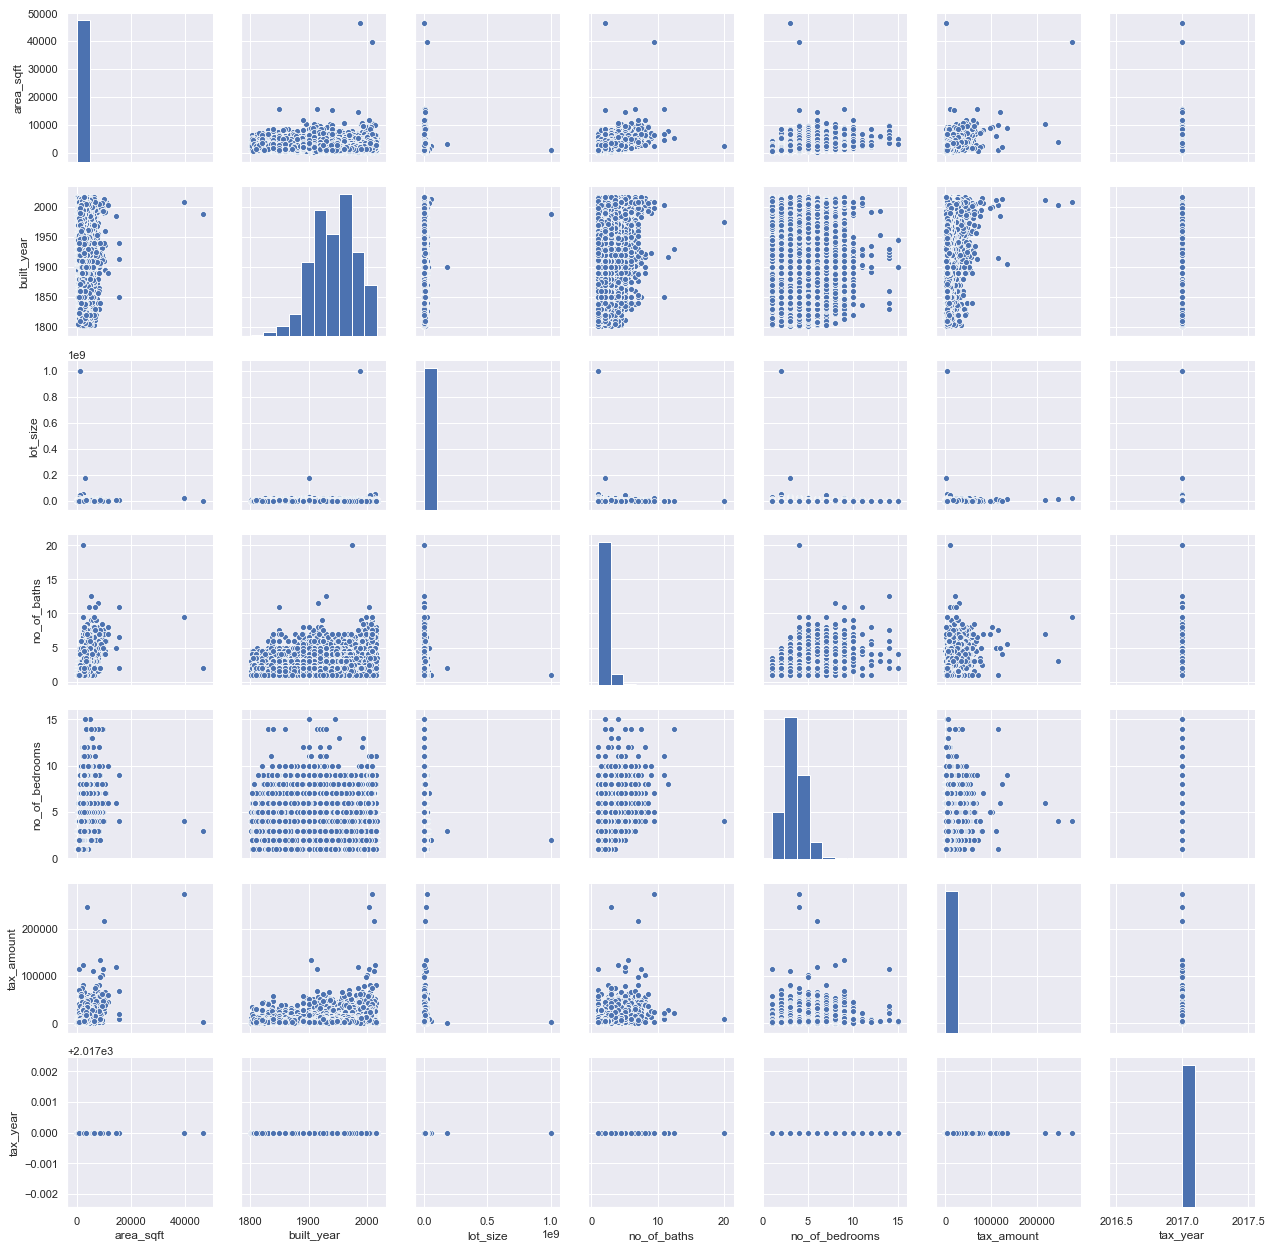

In [112]:
sns.pairplot(data=properties_df[['area_sqft', 'built_year', 'lot_size', 'no_of_baths', 'no_of_bedrooms', \
                                 'tax_amount', 'tax_year']])

### This subsection to prevent having to re-run the notebook from above

In [113]:
properties_temp = properties_df

In [114]:
properties_df = properties_temp

#### Find and remove outliers

In [115]:
properties_q1 = properties_df.quantile(0.25)
properties_q3 = properties_df.quantile(0.75)
properties_iqr = properties_q3 - properties_q1

print (properties_q3)
print ('----------------')
print (properties_q1)
print ('----------------')
print (properties_iqr)

area_sqft         2046.00 
built_year        1970.00 
lot_size          33105.60
no_of_baths       2.00    
no_of_bedrooms    4.00    
tax_amount        4986.54 
tax_year          2017.00 
Name: 0.75, dtype: float64
----------------
area_sqft         1234.0000
built_year        1920.0000
lot_size          5460.0000
no_of_baths       1.0000   
no_of_bedrooms    3.0000   
tax_amount        1204.4625
tax_year          2017.0000
Name: 0.25, dtype: float64
----------------
area_sqft         812.0000  
built_year        50.0000   
lot_size          27645.6000
no_of_baths       1.0000    
no_of_bedrooms    1.0000    
tax_amount        3782.0775 
tax_year          0.0000    
dtype: float64


Some columns within a limited range might be better off without outlier filtering to prevent losing large amount of data, so remove the ones from the IQR series that we don't want to filter outliers for.

Also, adjust the weights to multiply the individual column IQR's by, to prevent overfiltering or underfiltering.
To gauge this, look at the pairplot above to get an idea of the data, and also the various quartiles calculated.

In [116]:
properties_iqr = properties_iqr.drop(labels=['built_year', 'tax_year'])
properties_iqr

area_sqft         812.0000  
lot_size          27645.6000
no_of_baths       1.0000    
no_of_bedrooms    1.0000    
tax_amount        3782.0775 
dtype: float64

In [117]:
prop_outlier_wts = {
    'area_sqft': 2,
    'lot_size': 12,
    'no_of_baths': 4,
    'no_of_bedrooms': 5,
    'tax_amount': 10
}

In [118]:
for index, value in properties_iqr.items():
    print(index, value)
    # Select only the records that fall within the valid range, automatically ignores outliers
    properties_df = properties_df[(properties_df[index] >= (properties_q1[index] - 1.5 * properties_iqr[index])) & \
                                  (properties_df[index] <= (properties_q3[index] + prop_outlier_wts[index] * properties_iqr[index]))]
    print(properties_df.shape)

area_sqft 812.0
(303568, 13)
lot_size 27645.6
(285562, 13)
no_of_baths 1.0
(285541, 13)
no_of_bedrooms 1.0
(281396, 13)
tax_amount 3782.0775
(281389, 13)


In [119]:
properties_df.reset_index(drop=True, inplace=True)
properties_df

,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,property_url,state,tax_amount,tax_year,zip_code
0,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,NY,8320.40,2017,12531
1,26 Donovan Ln,1890.0,1992,Holmes,110206.8,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/26-donovan-ln-holmes-ny-12531--2349447123,NY,9260.24,2017,12531
2,553 Grape Hollow Rd,1272.0,1955,Holmes,40075.2,2.0,3.0,Single-Family Home,https://www.trulia.com/p/ny/holmes/553-grape-hollow-rd-holmes-ny-12531--2305201702,NY,7221.77,2017,12531
3,59 Van De Carr Rd,768.0,1955,Craryville,6098.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/59-van-de-carr-rd-craryville-ny-12521--2011547953,NY,1473.62,2017,12521
4,55 Van De Carr Rd,888.0,1951,Craryville,9148.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/55-van-de-carr-rd-craryville-ny-12521--2011547934,NY,2129.89,2017,12521
5,311 Taghkanic Churchtown Rd,1872.0,1990,Craryville,198198.0,1.0,4.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/311-taghkanic-churchtown-rd-craryville-ny-12521--2158455139,NY,7563.77,2017,12521
6,12 Taghkanic Churchtown Rd,1708.0,1998,Craryville,274428.0,1.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/12-taghkanic-churchtown-rd-craryville-ny-12521--2158455187,NY,5769.40,2017,12521
7,11 Taghkanic Churchtown Rd,1728.0,2007,Craryville,249163.2,2.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/11-taghkanic-churchtown-rd-craryville-ny-12521--1100838069,NY,5270.54,2017,12521
8,12 Taghkanic Churchtown Rd,1952.0,1996,Craryville,222591.6,1.5,3.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/12-taghkanic-churchtown-rd-craryville-ny-12521--2158455186,NY,6896.60,2017,12521
9,15 Tara Ln,1890.0,2003,Craryville,133729.2,2.0,2.0,Single-Family Home,https://www.trulia.com/p/ny/craryville/15-tara-ln-craryville-ny-12521--2158455201,NY,11356.08,2017,12521


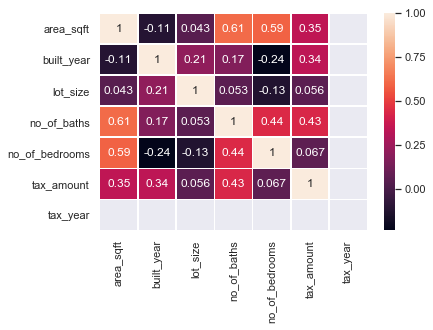

In [120]:
sns.heatmap(data=properties_df.corr(), linewidths=0.5, annot=True)

### High and medium correlated features from Properties

* area_sqft vs. no_of_baths (0.7)
* area_sqft vs. no_of_bedrooms (0.55)
* no_of_bedrooms vs no_of_baths (0.48)
* no_of_baths vs. tax_amount (0.46)
* area_sqft vs. tax_amount (0.46)

### Replotting relationships after removing outliers

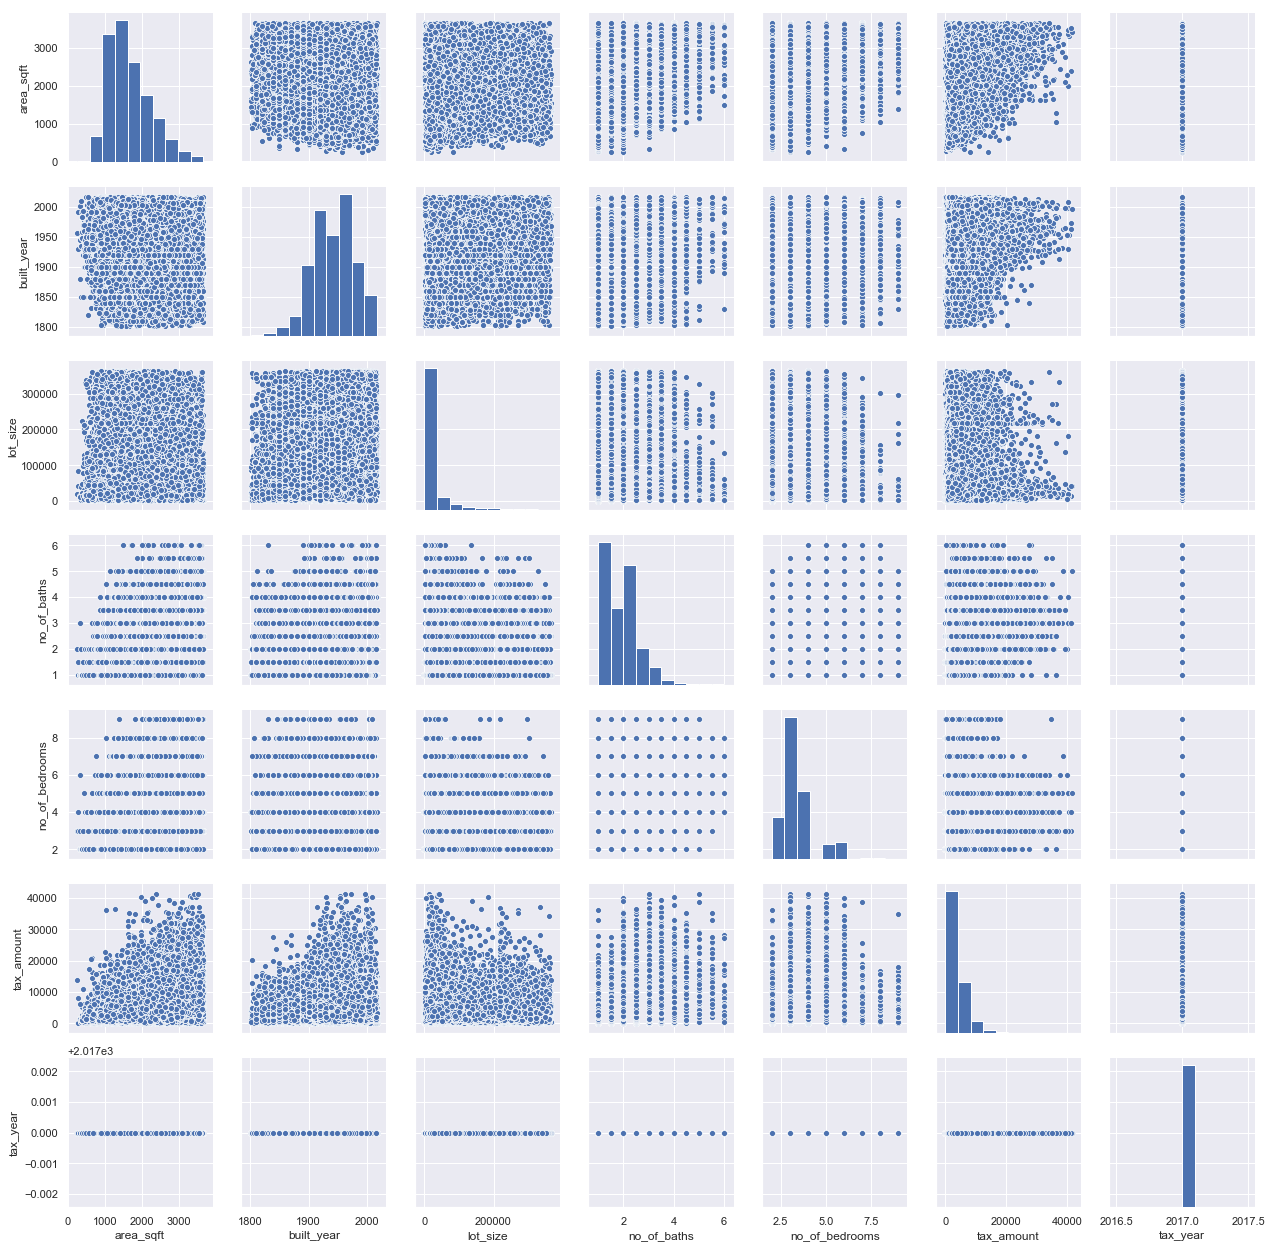

In [121]:
sns.pairplot(data=properties_df[['area_sqft', 'built_year', 'lot_size', 'no_of_baths', 'no_of_bedrooms', \
                                 'tax_amount', 'tax_year']])

### Plotting in US Map
#### Convert the cell types to Code to use it

Making a new column with a default value of one, so its value can be passed to map

properties_df_for_map = properties_df
properties_df_for_map['z'] = 1

properties_map_data = dict(type='choropleth',
            colorscale = 'YlOrRd',
            locations = properties_df_for_map['state'],
            z = properties_df_for_map['z'],
            locationmode = 'USA-states',
            text = properties_df_for_map['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Properties in US"}
            ) 

properties_map_layout = dict(title = 'US Properties by State',
                              geo = dict(scope='usa',
                                         showlakes = True,
                                         lakecolor = 'rgb(85,173,240)')
                             )

properties_choromap = go.Figure(data=[properties_map_data], layout=properties_map_layout)

In [122]:
'''
DO NOT UNCOMMENT, THE NOTEBOOK WILL FREEZE AND CRASH WHILE RENDERING THIS MAP
iplot(properties_choromap)
'''

'\nDO NOT UNCOMMENT, THE NOTEBOOK WILL FREEZE AND CRASH WHILE RENDERING THIS MAP\niplot(properties_choromap)\n'

### Transactions EDA

In [123]:
transactions_df = pd.read_csv("./output/engineered_trulia_transactions.csv", sep="|", parse_dates=['recording_date', 'contract_date'], \
                              encoding="latin1")
transactions_df

,contract_date,county_transfer_tax,document_type,price,property_url,recording_date,total_transfer_tax,transaction_type
0,1995-11-17,NaN,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,1995-12-12,NaN,Purchase/Resale Arm's Length Residential Transaction
1,2001-06-25,NaN,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,2001-07-30,NaN,Purchase/Resale Arm's Length Residential Transaction
2,2013-09-19,NaN,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2013-09-19,NaN,Insured Non-Residential Grant Deed
3,2006-12-28,NaN,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2007-01-03,NaN,Insured Non-Residential Grant Deed
4,2018-11-08,NaN,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2018-11-27,NaN,Purchase/Resale Arm's Length Residential Transaction
5,2016-08-12,NaN,Deed,122000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2016-08-15,NaN,Purchase/Resale Arm's Length Residential Transaction
6,2004-07-21,NaN,Deed,130000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2004-07-21,NaN,Purchase/Resale Arm's Length Residential Transaction
7,1998-08-27,NaN,Deed,385000.0,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,1998-08-28,NaN,Non-Arm's Length Transaction
8,2009-04-17,NaN,Deed,437500.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2009-04-17,NaN,Purchase/Resale Arm's Length Residential Transaction
9,2004-03-08,NaN,Deed,363750.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2004-03-09,NaN,Insured Non-Residential Grant Deed


In [124]:
transactions_df.describe()

,county_transfer_tax,price,total_transfer_tax
count,82645.000000,5.218600e+05,170159.000000
mean,587.678819,2.591695e+05,2217.799288
std,921.399786,2.270036e+06,4568.770271
min,1.000000,1.000000e+00,0.000000
25%,238.000000,5.500000e+04,682.000000
50%,454.000000,1.270000e+05,1220.000000
75%,725.000000,2.950000e+05,2112.000000
max,76126.000000,1.350009e+09,98000.000000


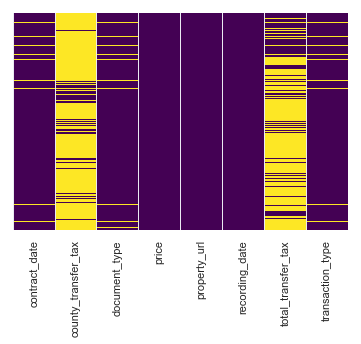

In [125]:
sns.heatmap(transactions_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Dropping the county_transfer_tax and total_transfer_tax columns cause they are heavily nulls and removing rows that have incomplete data cause they are few

In [126]:
transactions_df = transactions_df.drop(columns=['county_transfer_tax', 'total_transfer_tax'], axis=1)
transactions_df

,contract_date,document_type,price,property_url,recording_date,transaction_type
0,1995-11-17,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,1995-12-12,Purchase/Resale Arm's Length Residential Transaction
1,2001-06-25,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,2001-07-30,Purchase/Resale Arm's Length Residential Transaction
2,2013-09-19,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2013-09-19,Insured Non-Residential Grant Deed
3,2006-12-28,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2007-01-03,Insured Non-Residential Grant Deed
4,2018-11-08,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2018-11-27,Purchase/Resale Arm's Length Residential Transaction
5,2016-08-12,Deed,122000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2016-08-15,Purchase/Resale Arm's Length Residential Transaction
6,2004-07-21,Deed,130000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2004-07-21,Purchase/Resale Arm's Length Residential Transaction
7,1998-08-27,Deed,385000.0,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,1998-08-28,Non-Arm's Length Transaction
8,2009-04-17,Deed,437500.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2009-04-17,Purchase/Resale Arm's Length Residential Transaction
9,2004-03-08,Deed,363750.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2004-03-09,Insured Non-Residential Grant Deed


In [127]:
transactions_df = transactions_df[~(transactions_df['contract_date'].isnull() | \
                                    transactions_df['document_type'].isnull() | \
                                   transactions_df['transaction_type'].isnull() | \
                                   (transactions_df['price'] < 1000))]
transactions_df

,contract_date,document_type,price,property_url,recording_date,transaction_type
0,1995-11-17,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,1995-12-12,Purchase/Resale Arm's Length Residential Transaction
1,2001-06-25,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,2001-07-30,Purchase/Resale Arm's Length Residential Transaction
2,2013-09-19,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2013-09-19,Insured Non-Residential Grant Deed
3,2006-12-28,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,2007-01-03,Insured Non-Residential Grant Deed
4,2018-11-08,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2018-11-27,Purchase/Resale Arm's Length Residential Transaction
5,2016-08-12,Deed,122000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2016-08-15,Purchase/Resale Arm's Length Residential Transaction
6,2004-07-21,Deed,130000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,2004-07-21,Purchase/Resale Arm's Length Residential Transaction
7,1998-08-27,Deed,385000.0,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,1998-08-28,Non-Arm's Length Transaction
8,2009-04-17,Deed,437500.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2009-04-17,Purchase/Resale Arm's Length Residential Transaction
9,2004-03-08,Deed,363750.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,2004-03-09,Insured Non-Residential Grant Deed


In [128]:
transactions_df['recording_year'] = transactions_df['recording_date'].dt.year
transactions_df['recording_month'] = transactions_df['recording_date'].dt.month
transactions_df['recording_day'] = transactions_df['recording_date'].dt.day
transactions_df['contract_year'] = transactions_df['contract_date'].dt.year
transactions_df['contract_month'] = transactions_df['contract_date'].dt.month
transactions_df['contract_day'] = transactions_df['contract_date'].dt.day

transactions_df = transactions_df.drop(columns=['recording_date', 'contract_date'], axis=1)
transactions_df

,document_type,price,property_url,transaction_type,recording_year,recording_month,recording_day,contract_year,contract_month,contract_day
0,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,Purchase/Resale Arm's Length Residential Transaction,1995,12,12,1995,11,17
1,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,Purchase/Resale Arm's Length Residential Transaction,2001,7,30,2001,6,25
2,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,Insured Non-Residential Grant Deed,2013,9,19,2013,9,19
3,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,Insured Non-Residential Grant Deed,2007,1,3,2006,12,28
4,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,Purchase/Resale Arm's Length Residential Transaction,2018,11,27,2018,11,8
5,Deed,122000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,Purchase/Resale Arm's Length Residential Transaction,2016,8,15,2016,8,12
6,Deed,130000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,Purchase/Resale Arm's Length Residential Transaction,2004,7,21,2004,7,21
7,Deed,385000.0,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,Non-Arm's Length Transaction,1998,8,28,1998,8,27
8,Deed,437500.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,Purchase/Resale Arm's Length Residential Transaction,2009,4,17,2009,4,17
9,Deed,363750.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,Insured Non-Residential Grant Deed,2004,3,9,2004,3,8


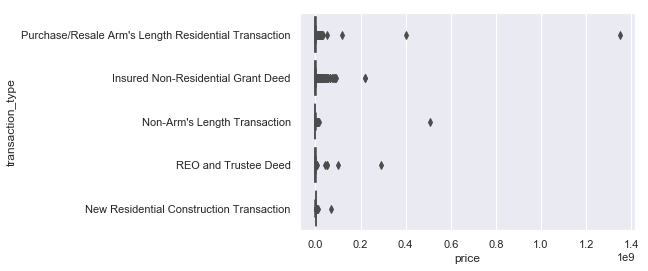

In [129]:
sns.boxplot(data=transactions_df, x='price', y='transaction_type')

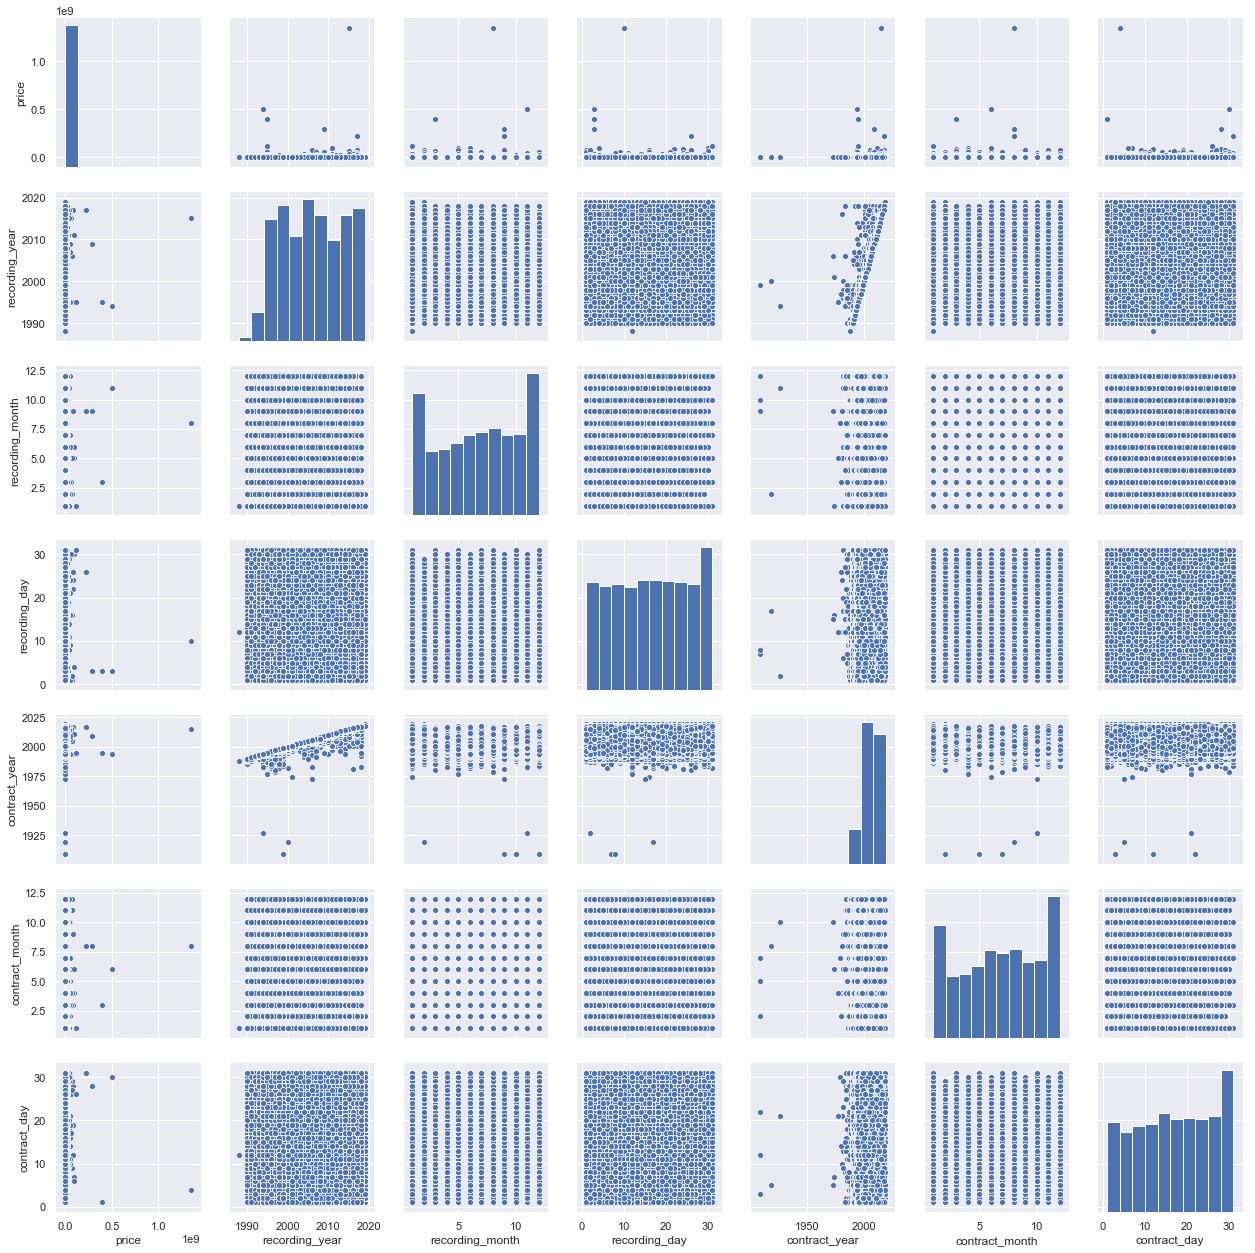

In [130]:
sns.pairplot(data=transactions_df)

### This subsection to prevent having to re-run the notebook from above

In [131]:
transactions_temp = transactions_df

In [132]:
transactions_df = transactions_temp

### Find, analyze and remove outliers in transaction data

In [133]:
transactions_q1 = transactions_df.quantile(0.25)
transactions_q3 = transactions_df.quantile(0.75)
transactions_iqr = transactions_q3 - transactions_q1

print (transactions_q3)
print ('----------------')
print (transactions_q1)
print ('----------------')
print (transactions_iqr)

price              295000.0
recording_year     2013.0  
recording_month    10.0    
recording_day      24.0    
contract_year      2013.0  
contract_month     10.0    
contract_day       24.0    
Name: 0.75, dtype: float64
----------------
price              57000.0
recording_year     2000.0 
recording_month    4.0    
recording_day      8.0    
contract_year      2000.0 
contract_month     4.0    
contract_day       9.0    
Name: 0.25, dtype: float64
----------------
price              238000.0
recording_year     13.0    
recording_month    6.0     
recording_day      16.0    
contract_year      13.0    
contract_month     6.0     
contract_day       15.0    
dtype: float64


Some columns within a limited range might be better off without outlier filtering to prevent losing large amount of data, so remove the ones from the IQR series that we don't want to filter outliers for.

Also, adjust the weights to multiply the individual column IQR's by, to prevent overfiltering or underfiltering.
To gauge this, look at the pairplot above to get an idea of the data, and also the various quartiles calculated.

In [134]:
transactions_iqr = transactions_iqr.drop(labels=['recording_month', 'recording_day', 'contract_month', 'contract_day'])
transactions_iqr

price             238000.0
recording_year    13.0    
contract_year     13.0    
dtype: float64

In [135]:
transactions_df.shape

(492558, 10)

In [136]:
transactions_df[transactions_df['price'] > 4000000].shape

(1124, 10)

It is important to adjust the weights for the outliers based on the Q1, Q3 and IQR values retrieved above to ensure we filter just the right number of outliers

In [137]:
txn_high_outlier_wts = {
    'price': 15,
    'recording_year': 0.6,
    'contract_year': 0.6
}

txn_low_outlier_wts = {
    'price': 0.2,
    'recording_year': 1.2,
    'contract_year': 1.2
}

In [138]:
for index, value in transactions_iqr.items():
    print(index, value)
    # Select only the records that fall within the valid range, automatically ignores outliers
    transactions_df = transactions_df[(transactions_df[index] >= (transactions_q1[index] - txn_low_outlier_wts[index] * transactions_iqr[index])) & \
                                  (transactions_df[index] <= (transactions_q3[index] + txn_high_outlier_wts[index] * transactions_iqr[index]))]
    print(transactions_df.shape)

price 238000.0
(468280, 10)
recording_year 13.0
(468280, 10)
contract_year 13.0
(468257, 10)


In [139]:
transactions_df.reset_index(drop=True, inplace=True)
transactions_df

,document_type,price,property_url,transaction_type,recording_year,recording_month,recording_day,contract_year,contract_month,contract_day
0,Deed,146796.0,https://www.trulia.com/p/ny/holmes/160-162-old-peckslip-rd-holmes-ny-12531--2349467107,Purchase/Resale Arm's Length Residential Transaction,1995,12,12,1995,11,17
1,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,Purchase/Resale Arm's Length Residential Transaction,2001,7,30,2001,6,25
2,Deed,70000.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,Insured Non-Residential Grant Deed,2013,9,19,2013,9,19
3,Deed,42500.0,https://www.trulia.com/p/ny/craryville/4-wheel-dr-craryville-ny-12521--2204807965,Insured Non-Residential Grant Deed,2007,1,3,2006,12,28
4,Deed,325000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,Purchase/Resale Arm's Length Residential Transaction,2018,11,27,2018,11,8
5,Deed,122000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,Purchase/Resale Arm's Length Residential Transaction,2016,8,15,2016,8,12
6,Deed,130000.0,https://www.trulia.com/p/ny/craryville/10-wang-dr-craryville-ny-12521--2011547166,Purchase/Resale Arm's Length Residential Transaction,2004,7,21,2004,7,21
7,Deed,385000.0,https://www.trulia.com/p/ny/craryville/126-taghkanic-churchtown-rd-craryville-ny-12521--2349607986,Non-Arm's Length Transaction,1998,8,28,1998,8,27
8,Deed,437500.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,Purchase/Resale Arm's Length Residential Transaction,2009,4,17,2009,4,17
9,Deed,363750.0,https://www.trulia.com/p/ny/craryville/110-taghkanic-churchtown-rd-craryville-ny-12521--2011547172,Insured Non-Residential Grant Deed,2004,3,9,2004,3,8


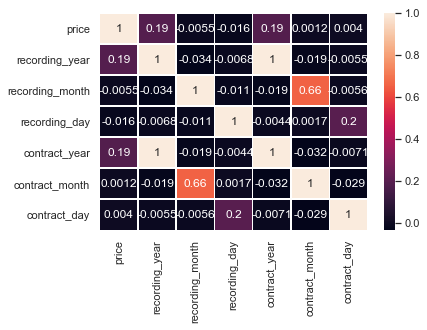

In [140]:
sns.heatmap(data=transactions_df.corr(), linewidths=0.5, annot=True)

### High and medium correlated features from Transactions

* recording_year vs. contract_year (1)
* recording_month vs. contract_month (0.66)

### Replotting relationships after removing outliers

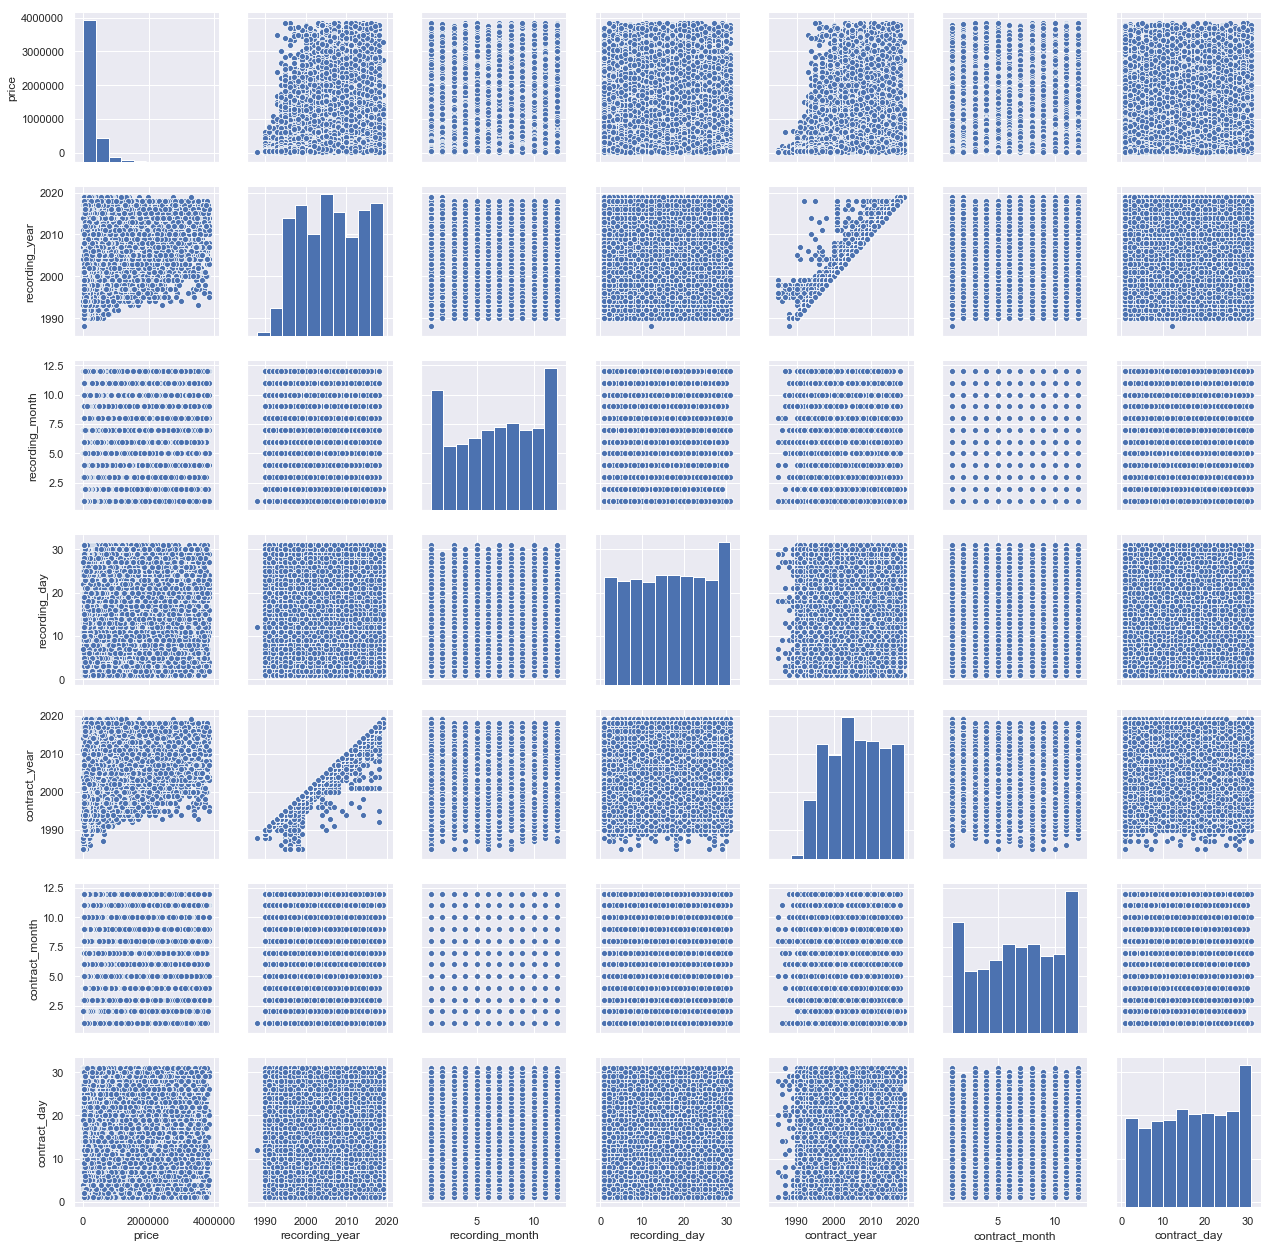

In [141]:
sns.pairplot(data=transactions_df)

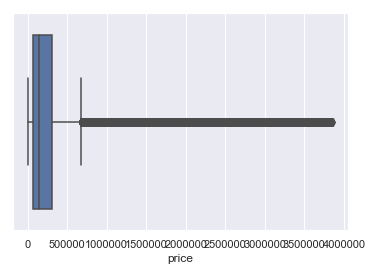

In [142]:
sns.boxplot(data=transactions_df, x='price')

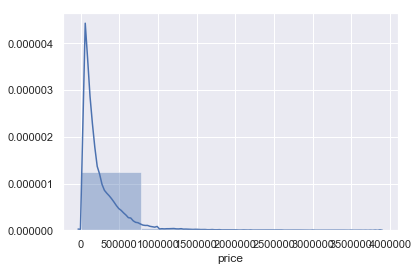

In [143]:
sns.distplot(transactions_df['price'], bins=5)

### Playin around with plot.ly

transactions_df[['price', 'total_transfer_tax']].iplot(kind='box')

transactions_df['price'].iplot(kind='hist', xTitle='price', yTitle='count', title='Price Distribution')

transactions_matrix_fig = ff.create_scatterplotmatrix(transactions_df[['price', 'total_transfer_tax', \
                                                                       'county_transfer_tax']], diag='histogram')
py.iplot(transactions_matrix_fig)

transactions_df[transactions_df['price'] == transactions_df['price'].max()]

### Enriching transactions data with properties data

In [144]:
transactions_master_df = pd.merge(transactions_df, properties_df, how='inner', on=['property_url'])
transactions_master_df

,document_type,price,property_url,transaction_type,recording_year,recording_month,recording_day,contract_year,contract_month,contract_day,address,area_sqft,built_year,city,lot_size,no_of_baths,no_of_bedrooms,property_type,state,tax_amount,tax_year,zip_code
0,Deed,224000.0,https://www.trulia.com/p/ny/holmes/10-cliff-ct-holmes-ny-12531--2305202587,Purchase/Resale Arm's Length Residential Transaction,2001,7,30,2001,6,25,10 Cliff Ct,1184.0,1997,Holmes,60984.0,2.5,3.0,Single-Family Home,NY,8320.40,2017,12531
1,Deed,417500.0,https://www.trulia.com/p/ny/craryville/311-taghkanic-churchtown-rd-craryville-ny-12521--2158455139,Purchase/Resale Arm's Length Residential Transaction,2005,7,25,2005,7,22,311 Taghkanic Churchtown Rd,1872.0,1990,Craryville,198198.0,1.0,4.0,Single-Family Home,NY,7563.77,2017,12521
2,Deed,32000.0,https://www.trulia.com/p/ny/craryville/12-taghkanic-churchtown-rd-craryville-ny-12521--2158455187,Insured Non-Residential Grant Deed,1996,10,18,1996,9,10,12 Taghkanic Churchtown Rd,1708.0,1998,Craryville,274428.0,1.0,2.0,Single-Family Home,NY,5769.40,2017,12521
3,Deed,235000.0,https://www.trulia.com/p/ny/craryville/11-taghkanic-churchtown-rd-craryville-ny-12521--1100838069,Purchase/Resale Arm's Length Residential Transaction,2016,10,25,2016,10,25,11 Taghkanic Churchtown Rd,1728.0,2007,Craryville,249163.2,2.5,3.0,Single-Family Home,NY,5270.54,2017,12521
4,Deed,15300.0,https://www.trulia.com/p/ny/craryville/12-taghkanic-churchtown-rd-craryville-ny-12521--2158455186,Insured Non-Residential Grant Deed,1994,6,3,1994,6,1,12 Taghkanic Churchtown Rd,1952.0,1996,Craryville,222591.6,1.5,3.0,Single-Family Home,NY,6896.60,2017,12521
5,Deed,650000.0,https://www.trulia.com/p/ny/craryville/15-tara-ln-craryville-ny-12521--2158455201,Purchase/Resale Arm's Length Residential Transaction,2008,2,1,2008,1,31,15 Tara Ln,1890.0,2003,Craryville,133729.2,2.0,2.0,Single-Family Home,NY,11356.08,2017,12521
6,Deed,18500.0,https://www.trulia.com/p/ny/craryville/15-tara-ln-craryville-ny-12521--2158455201,Insured Non-Residential Grant Deed,1997,3,21,1997,3,15,15 Tara Ln,1890.0,2003,Craryville,133729.2,2.0,2.0,Single-Family Home,NY,11356.08,2017,12521
7,Deed,84000.0,https://www.trulia.com/p/ny/craryville/tara-ln-craryville-ny-12521--2158455233,Insured Non-Residential Grant Deed,2009,6,23,2009,6,23,Tara Ln,3544.0,2011,Craryville,259617.6,3.0,2.0,Single-Family Home,NY,5488.14,2017,12521
8,Deed,55500.0,https://www.trulia.com/p/ny/craryville/tara-ln-craryville-ny-12521--2158455233,Purchase/Resale Arm's Length Residential Transaction,2004,6,16,2004,6,7,Tara Ln,3544.0,2011,Craryville,259617.6,3.0,2.0,Single-Family Home,NY,5488.14,2017,12521
9,REO Resale,55000.0,https://www.trulia.com/p/ny/craryville/52-two-town-rd-craryville-ny-12521--2011547915,Purchase/Resale Arm's Length Residential Transaction,2017,5,24,2017,5,10,52 Two Town Rd,1350.0,1992,Craryville,39639.6,1.5,2.0,Single-Family Home,NY,3074.64,2017,12521


### Exporting to continue in another notebook

In [145]:
transactions_master_df.to_csv("output/post_eda_transactions_master.csv", sep='|', index=False, quoting=csv.QUOTE_NONE)